# Model Selection

In [1]:
# Import Libraries

import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 20

### Load Data

In [2]:
df = pd.read_csv('/Users/briantreftz/GitHubRepos/Data/ProcessedData/DF_from_Feature_Sel_for_Model_Sel.csv')

In [46]:
print(df.shape)
print(df.info())
df.head()

(2742902, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742902 entries, 0 to 2742901
Data columns (total 12 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Carrier_Name              object
 1   Month                     object
 2   Week_Day                  object
 3   Origin                    object
 4   Destination               object
 5   Dep_Time_Block_Group      object
 6   Arr_Time_Block_Group      object
 7   Distance_Group            int64 
 8   Distance_Miles            int64 
 9   Scheduled_Departure_Time  int64 
 10  Scheduled_Arrival_Time    int64 
 11  Delayed                   int64 
dtypes: int64(5), object(7)
memory usage: 251.1+ MB
None


,Carrier_Name,Month,Week_Day,Origin,Destination,Dep_Time_Block_Group,Arr_Time_Block_Group,Distance_Group,Distance_Miles,Scheduled_Departure_Time,Scheduled_Arrival_Time,Delayed
0,United Air Lines Inc.,Sep,Tuesday,DEN,BNA,Afternoon,Night,5,1014,1743,2119,0
1,Delta Air Lines Inc.,Mar,Friday,SLC,SEA,Afternoon,Evening,3,689,1710,1823,0
2,American Airlines Inc.,Jun,Sunday,MCO,DFW,Early Morning,Early Morning,4,985,550,745,0
3,Delta Air Lines Inc.,Aug,Friday,JAX,BOS,Early Afternoon,Early Afternoon,5,1010,1215,1459,1
4,Southwest Airlines Co.,Apr,Tuesday,DAL,IND,Evening,Night,4,755,1955,2255,1


### Based off of the information gathered in Feature Selection I will use the following features in selecting a model:

> Categorical Variables:
> - Month
> - Week_Day
> - Origin
> - Destination
>
> Numeric Variables:
> - Scheduled_Departure_Time
> - Scheduled_Arrival_Time

### Check cardinality to determine encoding method

In [47]:
print("Cardinality of Month:", df['Month'].nunique())
print("Cardinality of Week_Day:", df['Week_Day'].nunique())
print("Cardinality of Origin:", df['Origin'].nunique())
print("Cardinality of Destination:", df['Destination'].nunique())


Cardinality of Month: 12
Cardinality of Week_Day: 7
Cardinality of Origin: 347
Cardinality of Destination: 348


### Preparing data and preprocessor to be used in pipeline

In [48]:
# Define dataset and target variable
X = df.drop('Delayed', axis=1)  # Features (all columns except 'Delayed')
y = df['Delayed']               # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

# Categorical columns for one-hot encoding
cat_cols = ['Carrier_Name', 'Month', 'Week_Day', 'Origin', 'Destination', 'Dep_Time_Block_Group', 'Arr_Time_Block_Group']

# Numerical columns for standard scaling 
num_cols = ['Distance_Group', 'Distance_Miles', 'Scheduled_Departure_Time', 'Scheduled_Arrival_Time']

# Preprocessing pipeline with handling of unknown categories
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),                                   # Numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols) # Categorical features
    ])

### Logistic Regression Model

In [56]:
# Define the full pipeline including classifier
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=1,max_iter=1000))
])

# Fit the pipeline on training data
clf_lr.fit(X_train, y_train)

# Predictions on test data
y_pred = clf_lr.predict(X_test)

# Calculate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)

# Calculate precision and recall
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred)

# Calculate ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)

# Calculate ROC AUC score
roc_auc_lr = roc_auc_score(y_test, y_pred)


# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)

### XGBoost

In [50]:
# Define the full pipeline including classifier
clf_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=1, eval_metric='logloss'))
])

# Fit the pipeline on training data
clf_xgb.fit(X_train, y_train)

# Predictions on test data
y_pred_xgb = clf_xgb.predict(X_test)

# Calculate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)


# Calculate precision and recall
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xgb)


# Calculate ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)

# Calculate ROC AUC score
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)


# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)



### CatBoost

In [51]:
# Define the full pipeline including classifier
clf_cb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(random_state=1, verbose=0))
])

# Fit the pipeline on training data
clf_cb.fit(X_train, y_train)

# Predictions on test data
y_pred_cb = clf_cb.predict(X_test)

# Calculate confusion matrix
cm_cb = confusion_matrix(y_test, y_pred_cb)


# Calculate precision and recall
precision_cb, recall_cb, _ = precision_recall_curve(y_test, y_pred_cb)


# Calculate ROC curve
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_pred_cb)

# Calculate ROC AUC score
roc_auc_cb = roc_auc_score(y_test, y_pred_cb)


# Calculate evaluation metrics
accuracy_cb = accuracy_score(y_test, y_pred_cb)
f1_cb = f1_score(y_test, y_pred_cb)



### Random Forest

In [52]:
# Define the full pipeline including classifier
clf_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10,
                                        random_state=1, n_jobs=-1))
])

# Fit the pipeline on training data
clf_rf.fit(X_train, y_train)

# Predictions on test data
y_pred_rf = clf_rf.predict(X_test)

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate precision and recall
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)

# Calculate ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# Calculate ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

## Model Performance Comparison

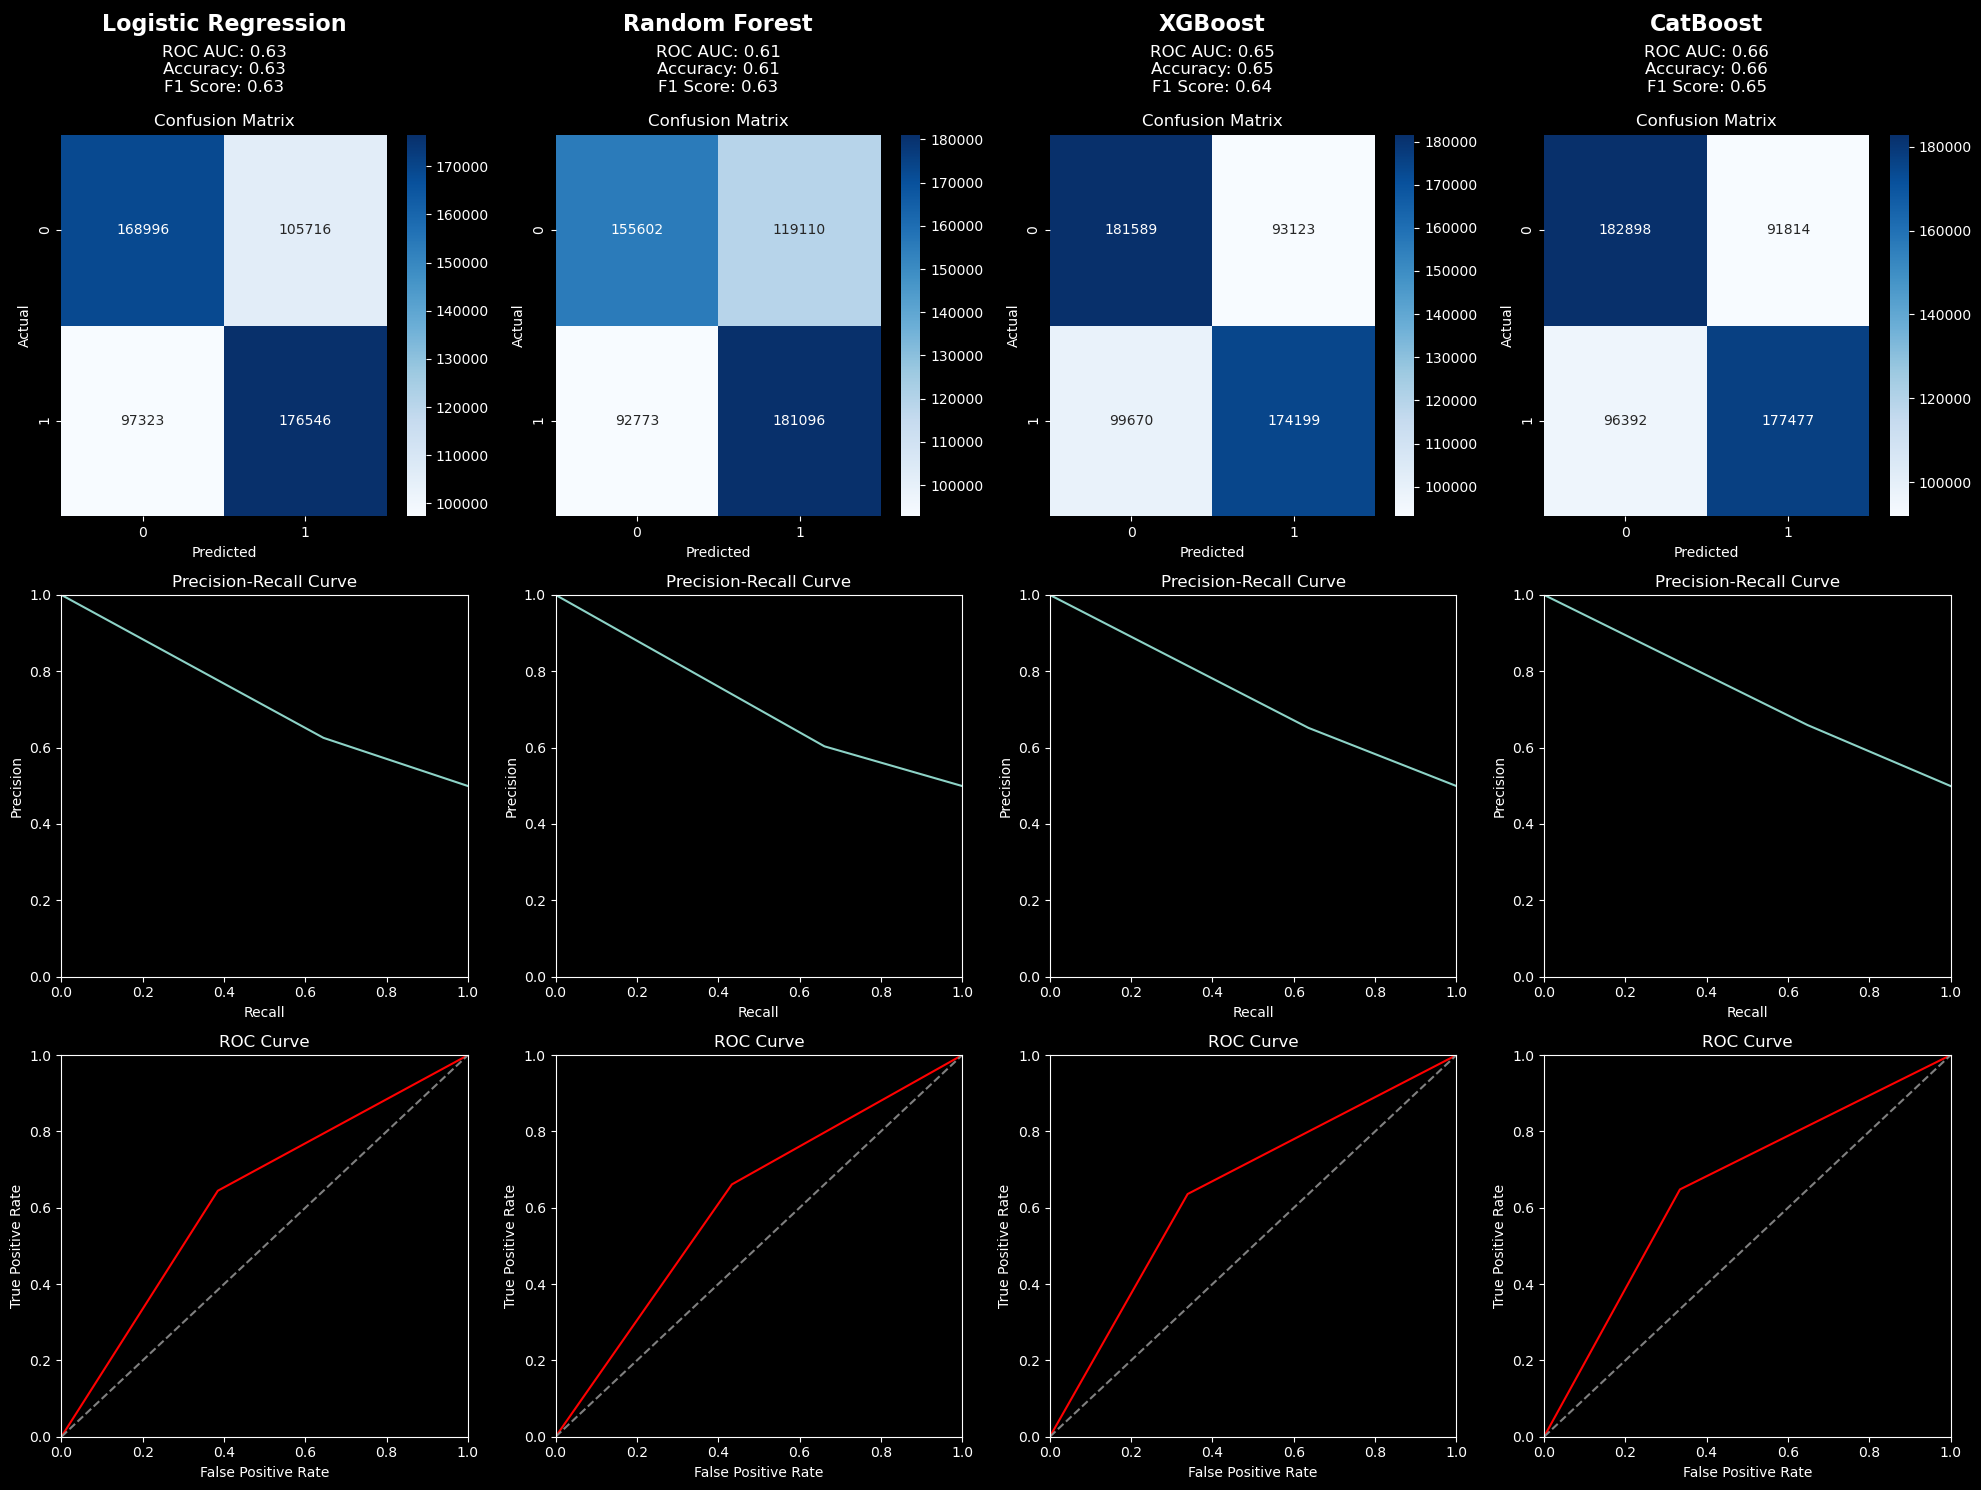

In [84]:
# Define classifiers
classifiers = {
    'Logistic Regression': {
        'cm': cm_lr,
        'precision': precision_lr,
        'recall': recall_lr,
        'fpr': fpr_lr,
        'tpr': tpr_lr,
        'roc_auc': roc_auc_lr,
        'accuracy': accuracy_lr,
        'f1': f1_lr
    },
    'Random Forest': {
        'cm': cm_rf,
        'precision': precision_rf,
        'recall': recall_rf,
        'fpr': fpr_rf,
        'tpr': tpr_rf,
        'roc_auc': roc_auc_rf,
        'accuracy': accuracy_rf,
        'f1': f1_rf
    },
    'XGBoost': {
        'cm': cm_xgb,
        'precision': precision_xgb,
        'recall': recall_xgb,
        'fpr': fpr_xgb,
        'tpr': tpr_xgb,
        'roc_auc': roc_auc_xgb,
        'accuracy': accuracy_xgb,
        'f1': f1_xgb
    },
    'CatBoost': {
        'cm': cm_cb,
        'precision': precision_cb,
        'recall': recall_cb,
        'fpr': fpr_cb,
        'tpr': tpr_cb,
        'roc_auc': roc_auc_cb,
        'accuracy': accuracy_cb,
        'f1': f1_cb
    }
}

# Initialize figure and axes
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# Loop over each classifier
for col, (model_name, metrics) in enumerate(classifiers.items()):
    # Plot Confusion Matrix
    sns.heatmap(metrics['cm'], annot=True, cmap='Blues', fmt='g', ax=axs[0, col])
    axs[0, col].text(0.5, 1.15, f'{model_name}\n\n\n\n', ha='center', va='center', transform=axs[0, col].transAxes, fontsize=16, weight='bold')
    axs[0, col].set_title(f'\n\nROC AUC: {metrics["roc_auc"]:.2f}\nAccuracy: {metrics["accuracy"]:.2f}\nF1 Score: {metrics["f1"]:.2f}\n\nConfusion Matrix')
    axs[0, col].set_xlabel('Predicted')
    axs[0, col].set_ylabel('Actual')
    
    # Plot Precision-Recall Curve
    axs[1, col].plot(metrics['recall'], metrics['precision'])
    axs[1, col].set_title(f'Precision-Recall Curve')
    axs[1, col].set_xlabel('Recall')
    axs[1, col].set_ylabel('Precision')
    axs[1, col].set_xlim([0, 1])
    axs[1, col].set_ylim([0, 1])
    
    # Plot ROC Curve
    axs[2, col].plot(metrics['fpr'], metrics['tpr'], color='red')
    axs[2, col].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axs[2, col].set_title(f'ROC Curve')
    axs[2, col].set_xlabel('False Positive Rate')
    axs[2, col].set_ylabel('True Positive Rate')
    axs[2, col].set_xlim([0, 1])
    axs[2, col].set_ylim([0, 1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Based on the provided performance metrics, let's compare the models:

### Accuracy
- Logistic Regression: 0.6299
- Random Forest: 0.6138
- XGBoost: 0.6486
- CatBoost: 0.6569

### F1 Score
- Logistic Regression: 0.6349
- Random Forest: 0.6309
- XGBoost: 0.6438
- CatBoost: 0.6535

### Precision (for positive class)
- Logistic Regression: 0.6255
- Random Forest: 0.6032
- XGBoost: 0.6516
- CatBoost: 0.6591

### Recall (for positive class)
- Logistic Regression: 0.6446
- Random Forest: 0.6612
- XGBoost: 0.6361
- CatBoost: 0.6480



## Summary
- CatBoost shows the highest **accuracy** (0.6569), **F1 score** (0.6535), and **precision** (0.6591).
- Random Forest** has the highest **recall** (0.6612), but it is not significantly better than the recall of other models, and its performance in other metrics is lower.

## Conclusion
#### I initially chose CatBoost as my model based on the provided performance metrics. It offered the best balance between accuracy, precision, recall, and F1 score. When I went to create the model in the next notebook though, it took 35 hours to tune the hyperparameters only to decrease in performance.   

#### In that case, and given the relative similar performance of all the models, I will using Logistic Regression as my model for this version of the project. In future editions where I intend on focusing on model robustness, I will consider a gradient boosting model.